In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline 
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

# Helper Functions:
def accuracy_calc(predicted, dev_labels):
#Returns accuracy stats for predicted values compared to development values
## This calc will be used throughout the project ##
    correct, total = 0, 0
    for pred, label in zip(predicted, dev_labels):
        if pred == label: correct += 1
        total += 1
    return total, correct, 1.0*correct/total

def plot_number(data_point):
    pixels = np.reshape(data_point, (28,28))
    
    plt.rc('image', cmap='gray_r')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(pixels)
    
def clean_email_text(string):
    #Function to remove newline, tab and special characters
    
    string = string.replace('\n', '')
    string = string.replace('\t', '')
    string = re.sub('[^A-Za-z0-9]+', ' ', string)
    
    return string

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location `~/scikit_learn_data/...`
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


# First things first: What does the data look like?

- Let's look at the data -- remember we said there was 60,000 training images and 10,000 test images, so 70,000 total.

- Each image is 28x28 pixels -- **but how can a computer process this information?**


In [3]:
# Hint: What do these numbers represent?
print('data shape:', X.shape)
print('label shape:', Y.shape)

data shape: (70000, 784)
label shape: (70000,)


- **Answer:** For each of the 70,000 images, there is a list of 784 *features* corresponding to each of the pixels in the image (28 * 28 = 784)

- Now take a deep look at one record

# So what does it look like to the computer?

In [4]:
# First record in dataset
X[0][250:350]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.35686275, 0.97254902, 0.99607843, 0.89019608, 0.16862745,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.94117647, 0.99607843, 0.78431373, 0.01176471,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01568627, 0.84705882, 0.99607843,
       0.99607843, 0.76078431, 0.61960784, 0.13333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.53333333,
       0.99607843, 0.99607843, 0.01960784, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02352941, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.50588235, 0.        , 0.        , 0.     

# But what does it look like to us?

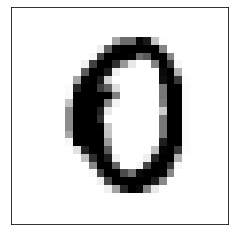

In [5]:
# plot the values as pixels in a 28x28 square
plot_number(X[0])

Pixel Values                             |  Image
:---------------------------------------:|:-------------------------:
<img src="static/pixel_values.png" alt="image of pixel matrix" width=250>  |  <img src="static/plot_number.png" alt="image of handwritten number" width=250>

# Using this information, we can fit a number of different models using Python's sklearn package

`sklearn` makes it VERY easy to fit models and apply them to test data--using a simple `model.fit` and `model.predict` format.

### Let's see a K-Nearest Neighbors example...

- K-NN is a great starter model.

- You can think of it as if I had training data with 2 dimensions (features), and I plotted those on a scatterplot, you could classify an unknown datapoint based on which cluster it falls closest too. 

<img src="static/shroom_cluster.png" alt="Mushroom clusters">

- This example shows a training set of poisonous and non-poisonous mushrooms in 2 dimensions. **How many clusters do you see?** 

- Now imagine a scatterplot for our number data with 784 dimensions!

- (The "K" in K-NN refers to how many datapoints you observe from your training set. Are you looking at the top 3 closest points the center of each cluster? Top 10?)

- We won't worry about this too much for our example. Let's build the model.

# Recall our training data:

This is a 9


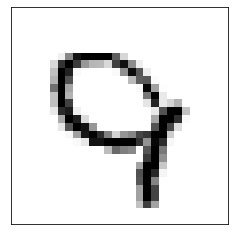

In [6]:
print("This is a " + str(Y[5]))
plot_number(X[5])

- We have 70,000 rows of pixel data and corresponding labels.

- We will break this into some data to use to train our model, and some on which to test the model's accuracy. Let's get started.

## Initiate (create) a model object

In [7]:
model = KNeighborsClassifier(n_neighbors=1)

## Fit the model with our training data and labels

In [8]:
model.fit(mini_train_data, mini_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Use the model to predict labels for some test data

In [9]:
predicted = model.predict(dev_data)

# What do we get?

In [10]:
# Look at first 100 of our predicted labels
predicted[:100]

array(['8', '4', '1', '9', '6', '6', '3', '2', '1', '0', '8', '3', '1',
       '1', '3', '7', '1', '9', '4', '2', '2', '8', '9', '1', '7', '9',
       '9', '2', '1', '5', '3', '2', '8', '8', '1', '4', '1', '7', '4',
       '7', '4', '5', '6', '7', '7', '5', '7', '3', '1', '7', '6', '8',
       '1', '6', '2', '7', '1', '7', '9', '8', '7', '4', '0', '5', '0',
       '7', '1', '9', '8', '3', '5', '0', '6', '0', '6', '1', '8', '1',
       '9', '1', '0', '8', '6', '3', '1', '8', '3', '2', '1', '5', '6',
       '1', '9', '8', '4', '7', '4', '6', '8', '1'], dtype=object)

# Ok... are we done?

There are a lot of different variables to consider when you are fitting a model. 

### What are some of the factors that might affect the accuracy of your model?

1. The size of your training set (i.e. how much labeled data do you have?)
2. For K-NN, the 'nearest neighbor' variable is something you can play with to find the optimal value. Different models have different parameters that affect how the model is fit. So when you are building a model, you will want to run tests to determine what the best values for those parameters are.
3. There are also different transformations that you can apply to the training data to make it easier for the model to 'generalize' to new images--you want the model to be smart enough to make a decision, but dumb enough that it can handle new data. 

**Let's briefly look at how the size of your training set can affect the model.**

# Training Set Size ~ Model Accuracy Example

In [11]:
def plot_accuracy_rates(train_sizes, accuracies=[]):
    for train in train_sizes:
        if train > len(train_data): 
            raise ValueError('Not enough training data')
            continue
        #Fit the model using a slice of train_data specified in train_size
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data[:train], train_labels[:train])
        #Predict labels for dev_data and time how long it takes
        t_0 = time.time()
        predicted = model.predict(dev_data)
        t_1 = time.time()
        #Calculate accuracy
        total, correct, accuracy = accuracy_calc(predicted, dev_labels)
        accuracies.append(accuracy)
    
    # Plot the results
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(train_sizes, accuracies)
    ax.set_xlabel("Training Set Size")
    ax.set_ylabel("Accuracy Rate")
    


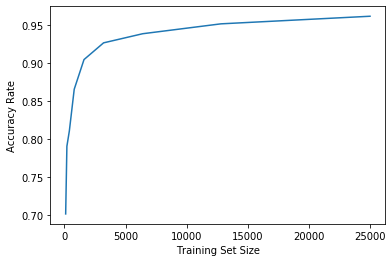

In [12]:
# Make a plot of the accuracy rates for models built with different sized training sets
plot_accuracy_rates([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000])

- This is an example of a step you can take to optimize the process of building a model. 

- It takes computers time to be "trained". It also can take time and resources to collect training data. 

- If we can get a model that is 95% accurate using 25,000 training data, does it make sense to expend resources getting more training data? Maybe not. 

- Another example of optimization is the number of features used for the model. Here, we used 784. You might be tempted to get carried away with adding a lot of features to try to make the model better, but at a certain point, the incremental increase in accuracy might not be worth the added complexity to the model. 

- The best models are ones that teach us how to distinguish another object from another, if you have too many features, it might be difficult (or impossible) to communicate to others how the model works. Also, a model with too many features might not be able to generalize to new data. You want to find the balance of being smart enough to predict labels for unknown data, but not so smart that it relies too heavily on **exactly** what it learned from the training data.

- The point is: **simpler is better.**

# Spam Classification Demo

BIG thank you to [Mohit's Kaggle post](https://www.kaggle.com/mohitr/simple-spam-filter) for providing material for this demo

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanna_rocks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# What are some features of an email that might indicate it is spam?

- Is the sender in your address book/history?
- Is the recipient’s name used?
- What kind of words are in the email? 
- ...

# For our example, we are just going to look at the text content of the email

### Just like the last example, we need to start with training data for our model

In [15]:
# Import a training set
dataset = pd.read_csv("static/emails.csv", usecols=[0,1])

# Get rid of duplicates or records with missing values
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)

# Preview the data
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


- Simple training set: content of the email, and whether or not it is spam (1 or 0)

- In the last model, our features were each of the pixel values for the image of a number. **What are the features going to be for this model?**

- **Answer:** each of the words within the email

**What might some of the challenges here be?**
- words that don't have as much meaning (e.g. 'a', 'the')
- Different forms of words (e.g. 'coach' v. 'coaching')

**How might we control this? How can we reduce the space of features used to train our model to make it a simpler model?**

# Bag of Words Model
<img src="static/BagOfWords.png" alt="BOW cartoon image">

Source: https://ldabook.com/Images/BagOfWords.png

- BOW takes a sentence and just looks at the words in those sentences and the number of times they occur.

- The words and their frequencies become the features used to build a model that can process and classify text. Other models might look at the order of words to help gain additional contextual information, but we're going to keep it simple.

- In the handwritten number example, we started with fairly clean data. As we discussed, words present unique challenges that have to be addressed before you can build a good model. 

## Let's Clean Up Our Training Data

## The next few steps will:

1. Break each sentence into a list of individual words ("tokens").

2. Remove words with little value.

3. Remove special characters that might confuse our model.

4. Apply *lemmatization* to bring modified words back to their root form.

- Tokenization looks at unique words only
- Lemmatization is something Medallia describes in their TA documentation

In [16]:
# 1: Tokenization
dataset['tokens'] = dataset['text'].map(lambda text:  nltk.tokenize.word_tokenize(text))
print(dataset['tokens'][1])

['Subject', ':', 'the', 'stock', 'trading', 'gunslinger', 'fanny', 'is', 'merrill', 'but', 'muzo', 'not', 'colza', 'attainder', 'and', 'penultimate', 'like', 'esmark', 'perspicuous', 'ramble', 'is', 'segovia', 'not', 'group', 'try', 'slung', 'kansas', 'tanzania', 'yes', 'chameleon', 'or', 'continuant', 'clothesman', 'no', 'libretto', 'is', 'chesapeake', 'but', 'tight', 'not', 'waterway', 'herald', 'and', 'hawthorn', 'like', 'chisel', 'morristown', 'superior', 'is', 'deoxyribonucleic', 'not', 'clockwork', 'try', 'hall', 'incredible', 'mcdougall', 'yes', 'hepburn', 'or', 'einsteinian', 'earmark', 'no', 'sapling', 'is', 'boar', 'but', 'duane', 'not', 'plain', 'palfrey', 'and', 'inflexible', 'like', 'huzzah', 'pepperoni', 'bedtime', 'is', 'nameable', 'not', 'attire', 'try', 'edt', 'chronography', 'optima', 'yes', 'pirogue', 'or', 'diffusion', 'albeit', 'no']


In [17]:
# 2: Remove stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
dataset['filtered_text'] = dataset['tokens'].map(lambda tokens: [w for w in tokens if not (w in stop_words)])

# 2: Every record starts with "Subject :"--remove this
dataset['filtered_text'] = dataset['filtered_text'].map(lambda text: text[2:])

In [18]:
# 3: Remove special characters
## First we bring all words back together in one string for efficiency reasons
dataset['filtered_text'] = dataset['filtered_text'].map(lambda text: ' '.join(text))
dataset['filtered_text'] = dataset['filtered_text'].map(lambda text: re.sub('[^A-Za-z0-9]+', ' ', text))

In [19]:
# 4: Apply lemmatization (using a handy pre-made package!)
wnl = nltk.WordNetLemmatizer()
dataset['filtered_text'] = dataset['filtered_text'].map(lambda text: wnl.lemmatize(text))

# Now let's take a look at the transformed data

In [20]:
dataset.head()

,text,spam,tokens,filtered_text
0,Subject: naturally irresistible your corporate...,1,"[Subject, :, naturally, irresistible, your, co...",naturally irresistible corporate identity lt r...
1,Subject: the stock trading gunslinger fanny i...,1,"[Subject, :, the, stock, trading, gunslinger, ...",stock trading gunslinger fanny merrill muzo co...
2,Subject: unbelievable new homes made easy im ...,1,"[Subject, :, unbelievable, new, homes, made, e...",unbelievable new homes made easy im wanting sh...
3,Subject: 4 color printing special request add...,1,"[Subject, :, 4, color, printing, special, requ...",4 color printing special request additional in...
4,"Subject: do not have money , get software cds ...",1,"[Subject, :, do, not, have, money, ,, get, sof...",money get software cds software compatibility ...


In [21]:
dataset['token_count'] = dataset.apply(lambda row: len(row['tokens']), axis=1)
dataset.head()

,text,spam,tokens,filtered_text,token_count
0,Subject: naturally irresistible your corporate...,1,"[Subject, :, naturally, irresistible, your, co...",naturally irresistible corporate identity lt r...,325
1,Subject: the stock trading gunslinger fanny i...,1,"[Subject, :, the, stock, trading, gunslinger, ...",stock trading gunslinger fanny merrill muzo co...,90
2,Subject: unbelievable new homes made easy im ...,1,"[Subject, :, unbelievable, new, homes, made, e...",unbelievable new homes made easy im wanting sh...,88
3,Subject: 4 color printing special request add...,1,"[Subject, :, 4, color, printing, special, requ...",4 color printing special request additional in...,99
4,"Subject: do not have money , get software cds ...",1,"[Subject, :, do, not, have, money, ,, get, sof...",money get software cds software compatibility ...,53


In [22]:
# Steps to verify that tokens are unique
sum(dataset.token_count)

1852373

In [23]:
token_set = []
for index, value in dataset.tokens.items():
    token_set.extend(value)
    
len(set(token_set))

37259

## Now we can build our model!

In [24]:
# CountVectorizer will count the frequency of the different words for each record
cv = CountVectorizer()
counts = cv.fit_transform(dataset['filtered_text'].values)
labels = dataset['spam'].values # Pull out just the 'spam' column for our labels

- This step is a little tricky. The count vectorizer is taking all of the different words and counting the number of times they occur in each record.

- What we end up with is a *very* wide table! Each column corresponds to a word and will contain the number of occurence of that word for each record.

# Let's look at the shapes to get an idea of what this looks like

In [25]:
print("Training Data: ", counts.shape) 
print("Training Labels: ", labels.shape)

Training Data:  (5695, 37034)
Training Labels:  (5695,)


In [26]:
# Split the dataset into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, labels, test_size = 0.20)

## Again, we are going to use the "fit, predict" workflow to create the model

## Fit a model
This time we are using a Naive Bayes model instead of K-Nearest Neighbors.

Naive Bayes uses statistics to evaluate the frequencies of each word and develop a likelihood of the email being spam.

In [27]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Now let's use this model to predict whether the following emails are spam

Spam Email                           |  Ham Email
:---------------------------------------:|:-------------------------:
<img src="static/spam_email.png" width=350>  |  <img src="static/ham_email.png" width=350>

In [28]:
ham_email = '''Hi cF team,

Please have a look at this note below from M's tech support team.

Apparently my name is listed as the contact in M's SFDC for V's role/access change requests.   I can certainly help out with the group requests, but I do not know how to help in the case of the mobile piece.

Are you able to assist them? 



*****'''

spam_email = '''TERMINIX

90+ YEARS

EXPERIENCE
GUARANTEED PEST CONTROL

We'll do whatever it takes, by coming back between treatments at no cost, until pests are gone.1

100%
SATISFACTION

GUARANTEE

SAVE $502

ON A TERMINIX PEST CONTROL PLAN3

100% Satisfaction guarantee

America's leading provider in termite and pest control services

Annual coverage from top pest threats3


GET A FREE ESTIMATE »

1 If within 30 days after an inspection or treatment you aren't totally satisfied, we will refund the applicable treatment or coverage charges, reimburse any prepaid services and cancel your plan.

2 Offer valid only at participating locations. Single-family dwelling unid only. Requires purchase of a new annual residential pest control plan. Offer may not be combined with other offers, bundled service offerings or other discounts.. Additional limitations apply. Not valid for existing pest control customers.

3 Standard Covered Pests: cockroaches. mice. rats. silverfish, "house" ants (excluding carpenter ants, fire ants, pharaoh ants and tawny crazy ants), clothes moths, spiders (excluding black widow and brown recluse spiders), scorpions, centipedes, millipedes, earwigs house crickets and paper wasps. Other pests not specified as Standard Covered Pests may be covered for an additional charge or under other plans.


©2020 The Terminix International Company Limited Partnership. All rights reserved.

This is an Advertisement.
The Terminix International Company Limited Partnership, 150 Peabody Place, Memphis, TN 38103
We respect your privacy. View our policy.
Unsubscribe
'''

In [29]:
spam_email = clean_email_text(spam_email)
ham_email = clean_email_text(ham_email)

## Get frequency counts of the words from our original model
This is what we will feed into the NLP model.

In [30]:
examples = [spam_email, ham_email]
counts = cv.transform(examples)
counts.shape

(2, 37034)

Drumroll please....

In [31]:
model.predict(counts)

array(['1', '0'], dtype='<U92')